## Load in the DEM

In [10]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import rasterio
from rasterio.plot import show
from rasterio.plot import show_hist

In [11]:
src = rasterio.open("../toy_data/USGS13:-122.57_37.81_-122.45_37.87.tif")

In [12]:
src

<open DatasetReader name='../toy_data/USGS13:-122.57_37.81_-122.45_37.87.tif' mode='r'>

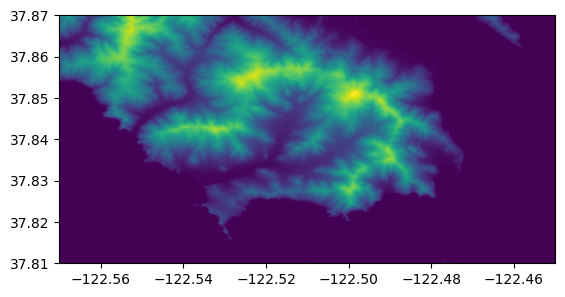

<AxesSubplot: >

In [13]:
show(src)

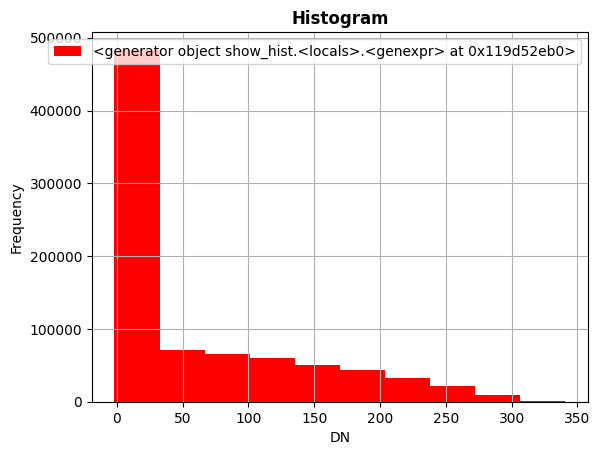

In [14]:
show_hist(src)

## Extract and plot a profile

In [15]:
src.crs

CRS.from_epsg(4269)

In [16]:
src.statistics(1)

Statistics(min=-1.8328540325164795, max=340.83868408203125, mean=57.62744128532205, std=79.36597778330587)

In [17]:
src.index

<bound method TransformMethodsMixin.index of <open DatasetReader name='../toy_data/USGS13:-122.57_37.81_-122.45_37.87.tif' mode='r'>>

In [18]:
src.files

['../toy_data/USGS13:-122.57_37.81_-122.45_37.87.tif',
 '../toy_data/USGS13:-122.57_37.81_-122.45_37.87.tif.aux.xml']

In [19]:
row,col = src.index(-122.53, 37.85)

In [20]:
row

215

In [21]:
col

431

start with just a row, later will do a line between any arbitrary two points

In [22]:
dem = src.read(1)

In [23]:
dem.shape

(648, 1296)

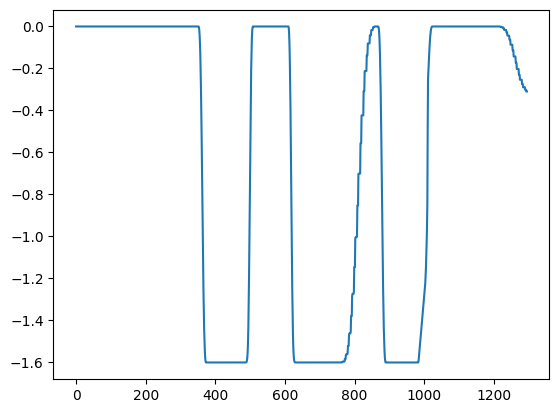

In [24]:
plt.plot(dem[600,:])

plot a line over the original raster for that row

In [25]:
a = plt.show(dem)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
a.hlines(600,0,1200)

In [26]:
?show

In [27]:
a.figure

NameError: name 'a' is not defined

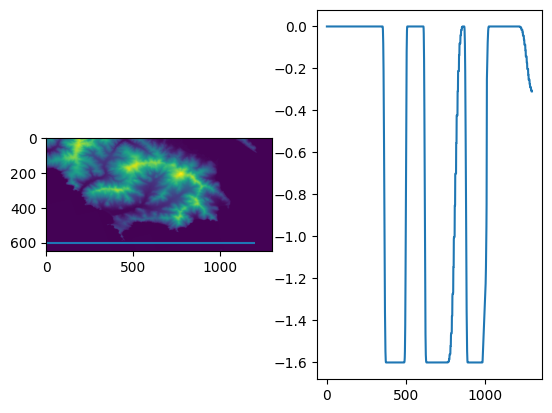

In [28]:
fig,axs = plt.subplots(1,2)
show(dem, ax=axs[0])
axs[0].hlines(600,0,1200)
axs[1] = plt.plot(dem[600,:])
plt.show()

In [54]:
def get_values(arr, p1, p2):
    minx = min(p1[0], p2[0])
    maxx = max(p1[0], p2[0])
    x_values = np.arange(minx, maxx+1)
    y_values = np.interp(x_values, [p1[0], p2[0]], [p1[1], p2[1]])
    y_values = np.around(y_values).astype(int)
    heights = arr[x_values, y_values]
    return heights, x_values, y_values

In [55]:
heights, x_vals, y_vals = get_values(dem, (0,2), (450, 617))

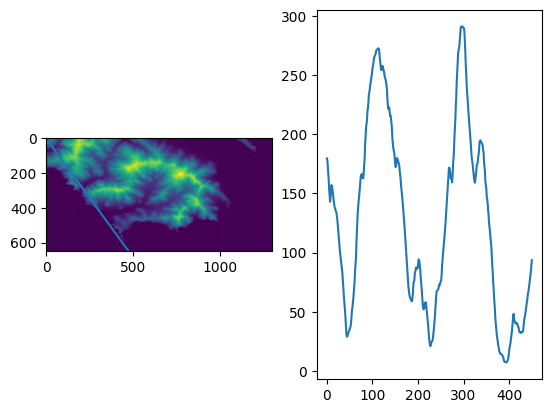

In [60]:
fig,axs = plt.subplots(1,2)
show(dem, ax=axs[0])
axs[0].axline(p1, p2)
axs[1] = plt.plot(heights)
plt.show()

In [53]:
y_values = np.interp(x_values, [p1[0], p2[0]], [p1[0], p2[0]])
y_values

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15